In [319]:
from time import sleep
import Pyro5.api 
import matplotlib.pyplot as plt
from TimeTagger import *
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

| # $C_{60}$ | n | Treshold (cts/ms) | n_bin_interval | $\alpha_{ON}$ |  $g^{(2)}(0)$ |
|-----------|-----------|-----------|-----------|-----------|-----------|
|  QD_8 (CW)  | 100 |  18  |  60 |  0.5216 ± 0.0123  | 0.390 | 
|  QD_9 (CW)  | 100 |  18  |  60 |  0.0396 ± 0.0131  | 0.515 | 
|  QD_12 (CW)  | 1000 |  7  |  80 |  0.1251 ± 0.0383  | 0.410 | 
|  QD_13 (CW)  | 100 |  50  |  150 |  0.5910 ± 0.0079  | 0.501 | 
|  QD_15 (CW)  | 100 | 30   | 50   |  0.7574 ± 0.0165  | 0.258 |  
|  QD_18 (CW 1)  | 1000 | 50   | 150   |  0.1570 ± 0.0277  | 0.648 |  
|  QD_18 (CW 2)  | 1000 | 50   | 150   |  0.2425 ± 0.0235  | 0.384 |  
|  QD_19 (CW)  | 100 |  50  |  150 |  0.3698 ± 0.0112  | 0.355 |  
|  QD_23 (CW)  | 1000 |  50  |  150 |  0.9481 ± 0.0428  | 0.642 |  
|  QD_29 (CW)  | 100 |  50  |  150 |  0.2986 ± 0.0248  | 0.308 |  


In [424]:
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-01-31_122954.ttbin' #QD_8 (CW) (Antibunching 0.390)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-01-31_124524.ttbin' #QD_9 (CW) (Antibunching  0.515)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-01-31_133636.ttbin' #QD_12 (CW) (Antibunching 0.410)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_104257.ttbin' #QD_13 (CW) (Antibunching 0.501)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_124705.ttbin' #QD_15 (CW) (Antibunching 0.258)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_133235.ttbin' #QD_18 (PW) (Antibunching 0.596)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_133025.ttbin' #QD_18 (CW 1) (Antibunching 0.648)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_134243.ttbin' #QD_18 (CW 2) (Antibunching 0.384)
file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_135243.ttbin' #QD_19 (CW) (Antibunching 0.355)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_141548.ttbin' #QD_21 (PW) (Antibunching 0.538)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_163955.ttbin' #QD_23 (PW 1) (Antibunching 0.810)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_164301.ttbin' #QD_23 (PW 2) (Antibunching 0.732)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_170035.ttbin' #QD_23 (PW 3) (Antibunching 0.715)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_171013.ttbin' #QD_23 (PW 4) (Antibunching 0.857)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-05_164935.ttbin' #QD_23 (CW) (Antibunching 0.642)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-05_172322.ttbin' #QD_24 (PW) (Antibunching 0.492)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-06_093717.ttbin' #QD_25 (CW) (Antibunching 0.795)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-06_095721.ttbin' #QD_26 (CW) (Antibunching 0.474)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-06_143420.ttbin' #QD_27 (PW) (Antibunching 0.741)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-06_144431.ttbin' #QD_28 (PW) (Antibunching 0.609)
# file = 'C:/Users/HP/Downloads/TimeTags_CW_Ful_2025-02-06_152655.ttbin' #QD_29 (CW) (Antibunching 0.291)
# file = 'C:/Users/HP/Downloads/TimeTags_PW_Ful_2025-02-06_153714.ttbin' #QD_29 (PW) (Antibunching 0.308)

In [425]:
# Now we are going to print all the configuration of the TT-Ultra at the moment of the measurement
fr = FileReader(file)
config = fr.getConfiguration()

for key, value in config.items():
    print(f"{key}: {value}")

channel number scheme: 2
configure version: 1
current time: 2025-02-05 13:52:44 +0100
devices: [{'FPGA ID': 11493476189726804, 'PCB UID': '00fdf287', 'PCB version': '1.8 (1)', 'minimum software version': '2.10.6', 'model': 'Time Tagger Ultra', 'serial': '2410001ABQ'}]
firmware version: TT-Ultra, FW6, TS 2024-02-09 12:21:10, OK 1.46
fpga link: {'enabled': False}
hardware buffer size: 67108864
inputs: [{'average rising falling': [False, False], 'channel': [1, -1], 'conditional filter filtered': [False, False], 'conditional filter triggers': [False, False], 'deadtime': [2000, 2000], 'delay hardware': [0, 0], 'delay software': [0, 0], 'event divider': [1, 1], 'hardware delay compensation': [333, 333], 'high priority channel': [False, False], 'input hysteresis': 0, 'input impedance high': False, 'input mux': 0, 'normalization': [True, True], 'resolution': 'Standard', 'resolution rms': 42.0, 'trigger level': 0.5}, {'average rising falling': [False, False], 'channel': [2, -2], 'conditional fi

In [426]:
virtual_tagger = createTimeTaggerVirtual()
virtual_tagger.getConfiguration()

# measure photon antibunching
ch1 = config['registered channels'][0] # first photon channel for antibunching measurements
ch2 = config['registered channels'][1] # second photon channel for antibunching measurements

cr = Countrate(virtual_tagger, [ch1, ch2])

virtual_tagger.setReplaySpeed(-1.0) # Speed of -1.0 will replay the data as fast as possible
virtual_tagger.replay(file, begin = 0, duration = -1) # collect data until the end 
virtual_tagger.waitForCompletion()

print(f"Rate of counts channel {ch1} (counts_ON/sec) : {cr.getData()[0]}")
print(f"Rate of counts channel {ch2} (counts/sec) : {cr.getData()[1]}")

Rate of counts channel 1 (counts_ON/sec) : 26442.94966477047
Rate of counts channel 2 (counts/sec) : 21119.829279462836


In [427]:
fr = FileReader(file)
fr_copy = FileReader(file)

acc_list = []
n = 100
# treshold = 2*np.mean(cr.getData())*1e-12
treshold = 50000*1e-12
print("Treshold: ", treshold, "\n")
t_ant = 0

rates = np.array([])
times = np.array([])

IniInterval = abs(fr_copy.getData(1).getTimestamps())
EndInterval = 0

intervals_ON = np.array([])
ini_interval_ON = 0
end_interval_ON = 0
intervals_OFF = np.array([])
ini_interval_OFF = 0
end_interval_OFF = 0

not_saved = 0
saved = 0
flag_ON = 0
flag_OFF = 0

while (fr.hasData()):
    data = fr.getData(n)
    data_copy = fr_copy.getData(n)
    
    ts = data.getTimestamps()
    ts_copy = data_copy.getTimestamps()
    ch = data.getChannels()
    
    #EndInterval = (abs(ts[-1] + ts_copy[0]))/2
    EndInterval = (abs(ts[-1] + ts_copy[-1]))/2
    if EndInterval == IniInterval:
        break
    
    data_raw = np.array([ch, ts])
    
    # Restructure into columns (one for each channel)
    data_ch1 = data_raw[1, np.where(data_raw[0,:] == ch1)].copy() # Canal 1
    data_ch2 = data_raw[1, np.where(data_raw[0,:] == ch2)].copy() # Canal 2
    
    # Creating an empty array the size of the largest dataset
    data_ch = np.zeros([2, max(data_ch1.shape[1], data_ch2.shape[1])])
    
    # Filling the channel columns with the respective data (one of them will always fall short)
    data_ch[0, :data_ch1.shape[1]] += data_ch1[0]
    data_ch[1, :data_ch2.shape[1]] += data_ch2[0]
    
    # Check we get all data
    #print(data_ch1.size, data_ch2.size, data_ch1.size+data_ch2.size)
    
    delta_t = abs(IniInterval - EndInterval)
    rate = n / delta_t
    
    times = np.append(times, abs(IniInterval + EndInterval)/2)
    rates = np.append(rates,rate)
    
    if (rate > treshold):
        acc_list.append(data_ch - t_ant)
        saved += 1
        
        if(flag_ON == 0):
            #Beginning ON interval
            ini_interval_ON = IniInterval
            flag_ON = 1
        if(flag_OFF == 1):
            #End OFF interval
            end_interval_OFF = IniInterval
            intervals_OFF = np.append(intervals_OFF, abs(end_interval_OFF - ini_interval_OFF))
            flag_OFF = 0
            
    else:
        t_ant += delta_t
        not_saved += 1

        if(flag_ON == 1):
            #End ON interval
            end_interval_ON = IniInterval
            intervals_ON = np.append(intervals_ON, abs(end_interval_ON - ini_interval_ON))
            flag_ON = 0
            
        if(flag_OFF == 0):
            #Beginning OFF interval
            ini_interval_OFF = IniInterval
            flag_OFF = 1
            
    IniInterval = EndInterval

if(flag_ON == 1):
    #End of last ON interval
    end_interval_ON = IniInterval
    intervals_ON = np.append(intervals_ON, abs(end_interval_ON - ini_interval_ON))
if(flag_OFF == 1):
    #End of last OFF interval
    end_interval_OFF = IniInterval
    intervals_OFF = np.append(intervals_OFF, abs(end_interval_OFF - ini_interval_OFF))
    flag_OFF = 0

print("Saved: ", saved)
print("Not Saved: ", not_saved)

Treshold:  5e-08 

Saved:  55840
Not Saved:  11370


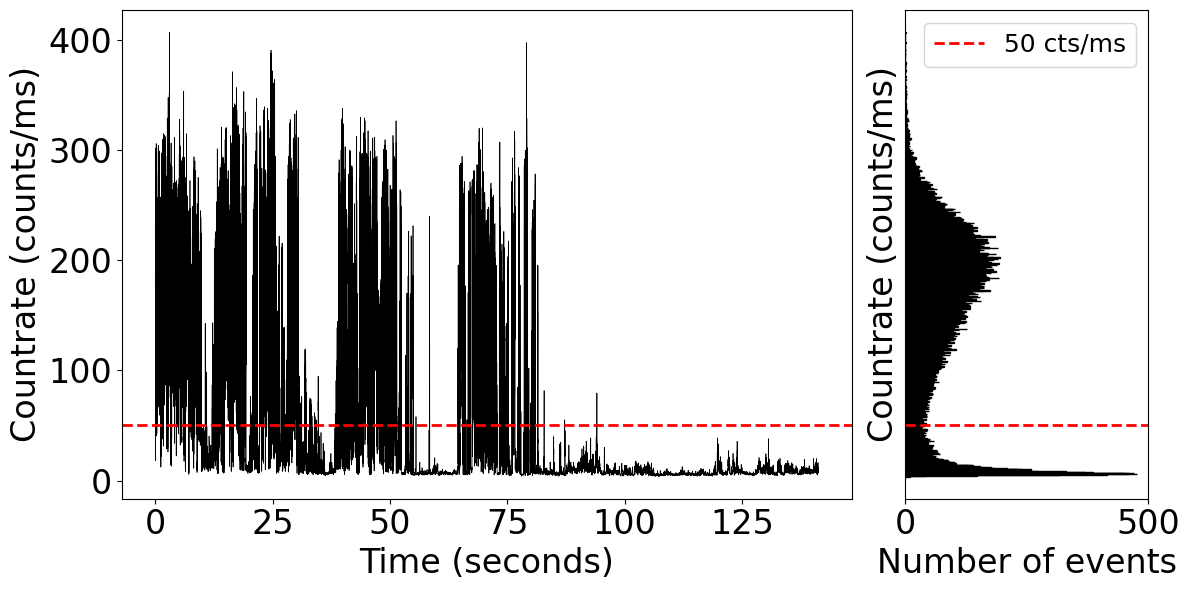

In [449]:
rates_hist = np.array(rates) * 1e9 #Pasamos la count-rate a counts/ms
times_hist = np.array(times - times[0]) * 1e-12 #Pasamos los tiempos a segundos

# Parámetros del histograma
num_bins = 1000
min_value = np.min(rates_hist)
max_value = np.max(rates_hist)

# Crear la figura y los subplots
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))

# Definir tamaño de fuente
font_size = 24

# Gráfica de línea en el eje izquierdo
ax_scatter.plot(times_hist, rates_hist, color='black', linewidth=0.5)  # Línea fina negra conectando puntos
ax_scatter.axhline(y=treshold * 1e9, color='red', linestyle='--', linewidth=2, label=f'Threshold ({treshold * 1e9:.0f})')
ax_scatter.set_xlabel('Time (seconds)', fontsize=font_size)
ax_scatter.set_ylabel('Countrate (counts/ms)', fontsize=font_size)
ax_scatter.tick_params(axis='both', labelsize=font_size)

# Histograma en el eje derecho, rotado 90 grados
ax_hist.hist(rates_hist, bins=num_bins, range=(min_value, max_value), color='blue', edgecolor='black', orientation='horizontal')
ax_hist.axhline(y=treshold * 1e9, color='red', linestyle='--', linewidth=2, label=f'{treshold * 1e9:.0f} cts/ms')
ax_hist.set_xlabel('Number of events', fontsize=font_size)
ax_hist.set_ylabel('Countrate (counts/ms)', fontsize=font_size)
ax_hist.set_yticks([])  # Eliminar valores y etiquetas en el eje Y
ax_hist.tick_params(axis='both', labelsize=font_size)
ax_hist.legend(fontsize = 18)

# Ajustar el layout para que no se solapen
plt.tight_layout()
plt.show()


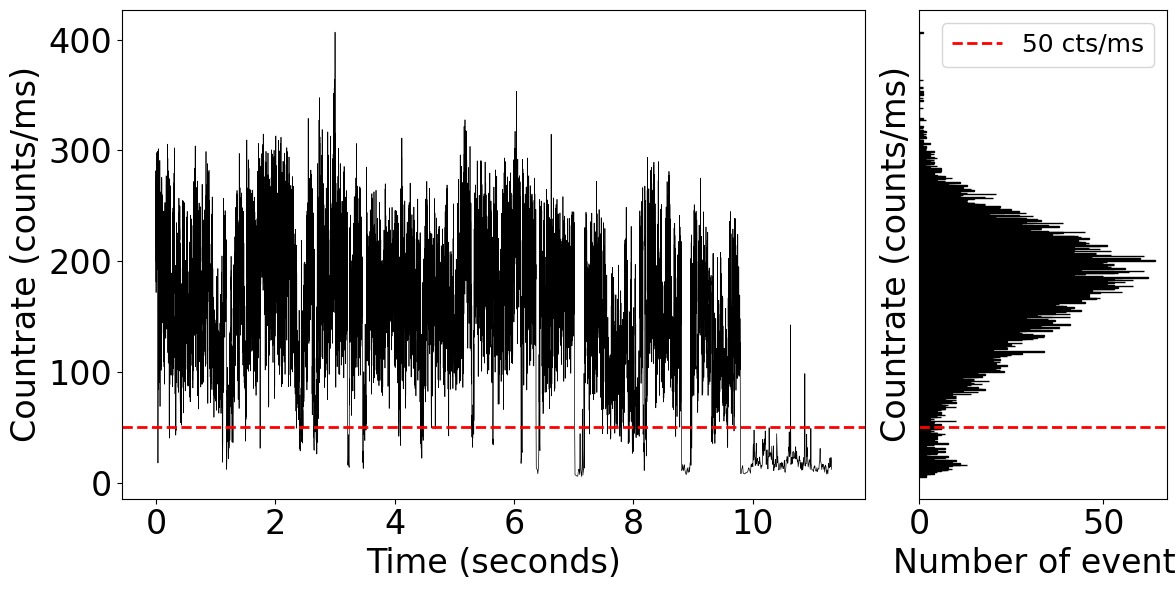

In [450]:
rates_hist = np.array(rates) * 1e9 #Pasamos la count-rate a counts/ms
times_hist = np.array(times - times[0]) * 1e-12 #Pasamos los tiempos a segundos

# Indices a representar
ini_index = 0
end_index = 15000

# Parámetros del histograma
num_bins = 1000
min_value = np.min(rates_hist[ini_index:end_index])
max_value = np.max(rates_hist[ini_index:end_index])

# Crear la figura y los subplots
fig, (ax_scatter, ax_hist) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))

# Gráfica de línea en el eje izquierdo
ax_scatter.plot(times_hist[ini_index:end_index], rates_hist[ini_index:end_index], color='black', linewidth=0.5)  # Línea fina negra conectando puntos
ax_scatter.axhline(y=treshold * 1e9, color='red', linestyle='--', linewidth=2, label=f'Threshold ({treshold * 1e9:.0f})')
ax_scatter.set_xlabel('Time (seconds)', fontsize=font_size)
ax_scatter.set_ylabel('Countrate (counts/ms)', fontsize=font_size)
ax_scatter.tick_params(axis='both', labelsize=font_size)

# Histograma en el eje derecho, rotado 90 grados
ax_hist.hist(rates_hist[ini_index:end_index], bins=num_bins, range=(min_value, max_value), color='blue', edgecolor='black', orientation='horizontal')
ax_hist.axhline(y=treshold * 1e9, color='red', linestyle='--', linewidth=2, label=f'{treshold * 1e9:.0f} cts/ms')
ax_hist.set_xlabel('Number of events', fontsize=font_size)
ax_hist.set_ylabel('Countrate (counts/ms)', fontsize=font_size)
ax_hist.set_yticks([])  # Eliminar valores y etiquetas en el eje Y
ax_hist.tick_params(axis='both', labelsize=font_size)
ax_hist.legend(fontsize = 18)

# Ajustar el layout para que no se solapen
plt.tight_layout()
plt.show()

Exponential Decay Fit Parameters:
A = 1252.001 ± 40.964
tau_0 = 0.0062 ± 0.0002 seconds 

Power Law Fit Parameters:
a = 0.351 ± 0.021
alpha = 0.3698 ± 0.0112


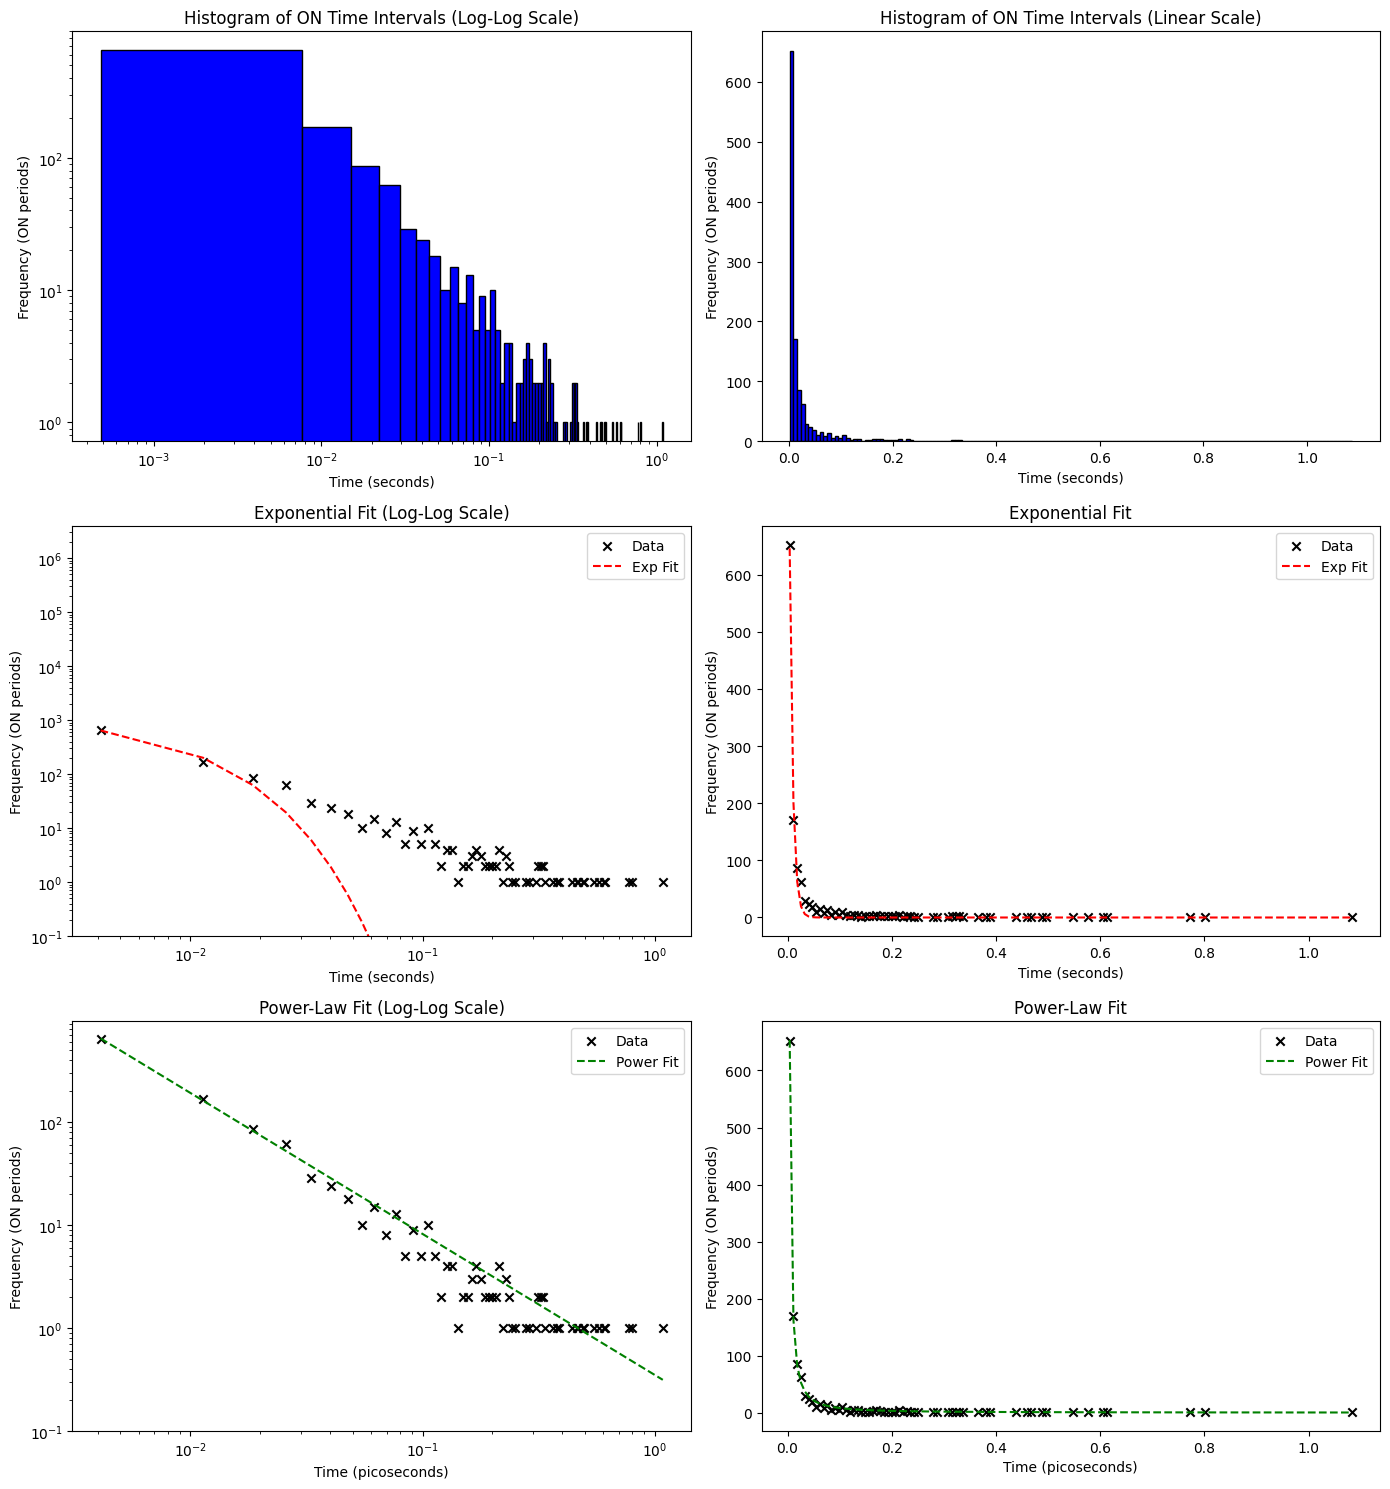

In [430]:
# Define parameters
n_bin_interval = 150
intervals_ON_sec = intervals_ON
intervals_ON_sec = intervals_ON * 1e-12 # Tenemos el tiempo en segundos
min_val = np.min(intervals_ON_sec)
max_val = np.max(intervals_ON_sec)

# Calculate histogram data for fitting
counts, bin_edges = np.histogram(intervals_ON_sec, bins=n_bin_interval, range=(min_val, max_val))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Creamos una máscara booleana donde counts no es igual a 0
mask = counts != 0
# Aplicamos la máscara a ambos arrays
counts_ON = counts[mask]
bin_centers_ON = bin_centers[mask]

# ---- Define fit functions ----
def exponential_decay(tau, A, tau_0):
    return A * np.exp(-tau / tau_0)

def power_law(tau, a, alpha):
    return a * tau ** (-1 - alpha)

# ---- Perform fits ----
# Initial parameter guesses
exp_initial_guess = [max(counts_ON), 1]
power_initial_guess = [max(counts_ON), 1]

# Fit exponential decay
exp_params, exp_covariance = curve_fit(exponential_decay, bin_centers_ON, counts_ON, p0=exp_initial_guess)
exp_errors = np.sqrt(np.diag(exp_covariance))  # Errors are the square root of the diagonal of the covariance matrix

# Fit power law
power_params, power_covariance = curve_fit(power_law, bin_centers_ON, counts_ON, p0=power_initial_guess)
power_errors = np.sqrt(np.diag(power_covariance))

# ---- Print parameters and errors ----
print("Exponential Decay Fit Parameters:")
print(f"A = {exp_params[0]:.3f} ± {exp_errors[0]:.3f}")
print(f"tau_0 = {exp_params[1]:.4f} ± {exp_errors[1]:.4f} seconds \n")
print("Power Law Fit Parameters:")
print(f"a = {power_params[0]:.3f} ± {power_errors[0]:.3f}")
print(f"alpha = {power_params[1]:.4f} ± {power_errors[1]:.4f}")

# Create a figure with 3 rows and 2 columns of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# ---- Original Histogram ----
# Plot histogram with logarithmic scale
axs[0, 0].hist(intervals_ON_sec, bins=n_bin_interval, range=(min_val, max_val), color='blue', edgecolor='black')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel("Time (seconds)")
axs[0, 0].set_ylabel("Frequency (ON periods)")
axs[0, 0].set_title("Histogram of ON Time Intervals (Log-Log Scale)")

# Plot histogram with linear scale
axs[0, 1].hist(intervals_ON_sec, bins=n_bin_interval, range=(min_val, max_val), color='blue', edgecolor='black')
axs[0, 1].set_xlabel("Time (seconds)")
axs[0, 1].set_ylabel("Frequency (ON periods)")
axs[0, 1].set_title("Histogram of ON Time Intervals (Linear Scale)")

# ---- Scatter Plot of Binned Frequencies with Fits ----
# Plot scatter with log-log scale
axs[1, 0].scatter(bin_centers_ON, counts_ON, color='k', marker='x', label="Data")
axs[1, 0].plot(bin_centers_ON, exponential_decay(bin_centers_ON, *exp_params), color='red', linestyle='--', label="Exp Fit")
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylim(bottom=1e-1)
axs[1, 0].set_xlabel("Time (seconds)")
axs[1, 0].set_ylabel("Frequency (ON periods)")
axs[1, 0].set_title("Exponential Fit (Log-Log Scale)")
axs[1, 0].legend()

# Plot scatter with linear scale
axs[1, 1].scatter(bin_centers_ON, counts_ON, color='k', marker='x', label="Data")
axs[1, 1].plot(bin_centers_ON, exponential_decay(bin_centers_ON, *exp_params), color='red', linestyle='--', label="Exp Fit")
axs[1, 1].set_xlabel("Time (seconds)")
axs[1, 1].set_ylabel("Frequency (ON periods)")
axs[1, 1].set_title("Exponential Fit")
axs[1, 1].legend()

# ---- Individual Fit Plots ----
# Power-Law fit in log scale
axs[2, 0].scatter(bin_centers_ON, counts_ON, color='k', marker='x', label="Data")
axs[2, 0].plot(bin_centers_ON, power_law(bin_centers_ON, *power_params), color='green', linestyle='--', label="Power Fit")
axs[2, 0].set_xscale('log')
axs[2, 0].set_yscale('log')
axs[2, 0].set_ylim(bottom=1e-1)
axs[2, 0].set_xlabel("Time (picoseconds)")
axs[2, 0].set_ylabel("Frequency (ON periods)")
axs[2, 0].set_title("Power-Law Fit (Log-Log Scale)")
axs[2, 0].legend()

# Power-law fit in log-log scale
axs[2, 1].scatter(bin_centers_ON, counts_ON, color='k', marker='x', label="Data")
axs[2, 1].plot(bin_centers_ON, power_law(bin_centers_ON, *power_params), color='green', linestyle='--', label="Power Fit")
axs[2, 1].set_xlabel("Time (picoseconds)")
axs[2, 1].set_ylabel("Frequency (ON periods)")
axs[2, 1].set_title("Power-Law Fit")
axs[2, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

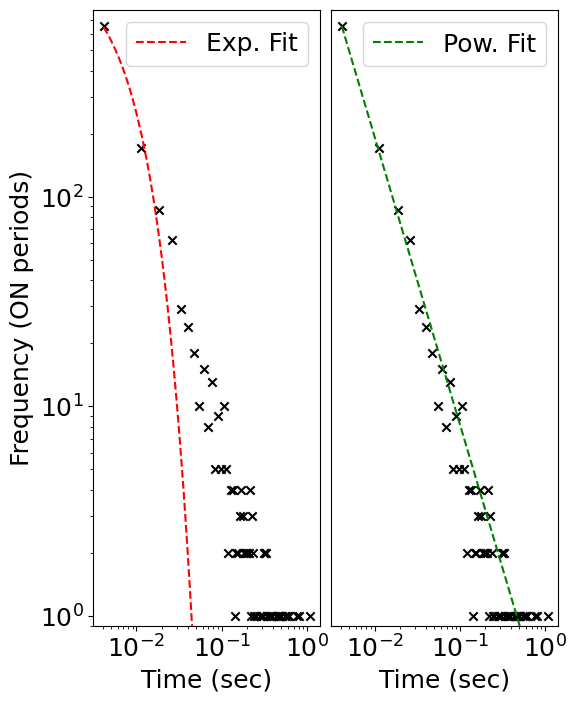

alpha = 0.3698 ± 0.0112


In [448]:
# Define font size
font_size = 18

x_fit = np.linspace(min(bin_centers_ON), max(bin_centers_ON), 10000)

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 8))

# Plot exponential fit with log-log scale
axs[0].scatter(bin_centers_ON, counts_ON, color='k', marker='x')
axs[0].plot(x_fit, exponential_decay(x_fit, *exp_params), color='red', linestyle='--', label="Exp. Fit")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=0.9, top=max(counts_ON) + max(counts_ON)/5)
axs[0].set_xlabel("Time (sec)", fontsize=font_size)
axs[0].set_ylabel("Frequency (ON periods)", fontsize=font_size)
axs[0].legend(fontsize=font_size)

# Plot power-law fit with log-log scale
axs[1].scatter(bin_centers_ON, counts_ON, color='k', marker='x')
axs[1].plot(x_fit, power_law(x_fit, *power_params), color='green', linestyle='--', label="Pow. Fit")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(bottom=0.9, top=max(counts_ON) + max(counts_ON)/5)
axs[1].set_xlabel("Time (sec)", fontsize=font_size)
axs[1].legend(fontsize=font_size)

# Remove Y-axis numbers from the second subplot
axs[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Adjust tick parameters for both axes (size of tick labels)
for ax in axs:
    ax.tick_params(axis='both', which='both', labelsize=font_size)  # Apply font size to ticks

# Adjust space between subplots
plt.subplots_adjust(wspace=0.05)  # Reduce the space between the two plots

plt.show()

print(f"alpha = {power_params[1]:.4f} ± {power_errors[1]:.4f}")

In [432]:
# Calculate the fitted values
exp_fit_values = exponential_decay(bin_centers_ON, *exp_params)
power_fit_values = power_law(bin_centers_ON, *power_params)

# Calculate Sum of Squared Residuals (SSR)
ssr_exp = np.sum((counts_ON - exp_fit_values) ** 2)
ssr_power = np.sum((counts_ON - power_fit_values) ** 2)

# Calculate R² values
r_squared_exp = 1 - (ssr_exp / np.sum((counts_ON - np.mean(counts_ON)) ** 2))
r_squared_power = 1 - (ssr_power / np.sum((counts_ON - np.mean(counts_ON)) ** 2))

# Print results
print(f"Exponential Fit: SSR = {ssr_exp}, R² = {r_squared_exp}")
print(f"Power Law Fit: SSR = {ssr_power}, R² = {r_squared_power}")

# Determine which fit is better
if ssr_exp < ssr_power:
    print("The exponential fit is more accurate based on SSR.")
else:
    print("The power-law fit is more accurate based on SSR.")

if r_squared_exp > r_squared_power:
    print("The exponential fit is more accurate based on R².")
else:
    print("The power-law fit is more accurate based on R².")

Exponential Fit: SSR = 5642.127467663924, R² = 0.9872658721149813
Power Law Fit: SSR = 518.2542763634895, R² = 0.998830314226328
The power-law fit is more accurate based on SSR.
The power-law fit is more accurate based on R².


Exponential Decay Fit Parameters:
A = 3569.412 ± 181.545
tau_0 = 0.0072 ± 0.0003 seconds 

Power Law Fit Parameters:
a = 0.027 ± 0.004
alpha = 1.2553 ± 0.0333


C:\Users\HP\AppData\Local\Temp\ipykernel_7396\2425368364.py:20: RuntimeWarning: overflow encountered in exp
  return A * np.exp(-tau / tau_0)


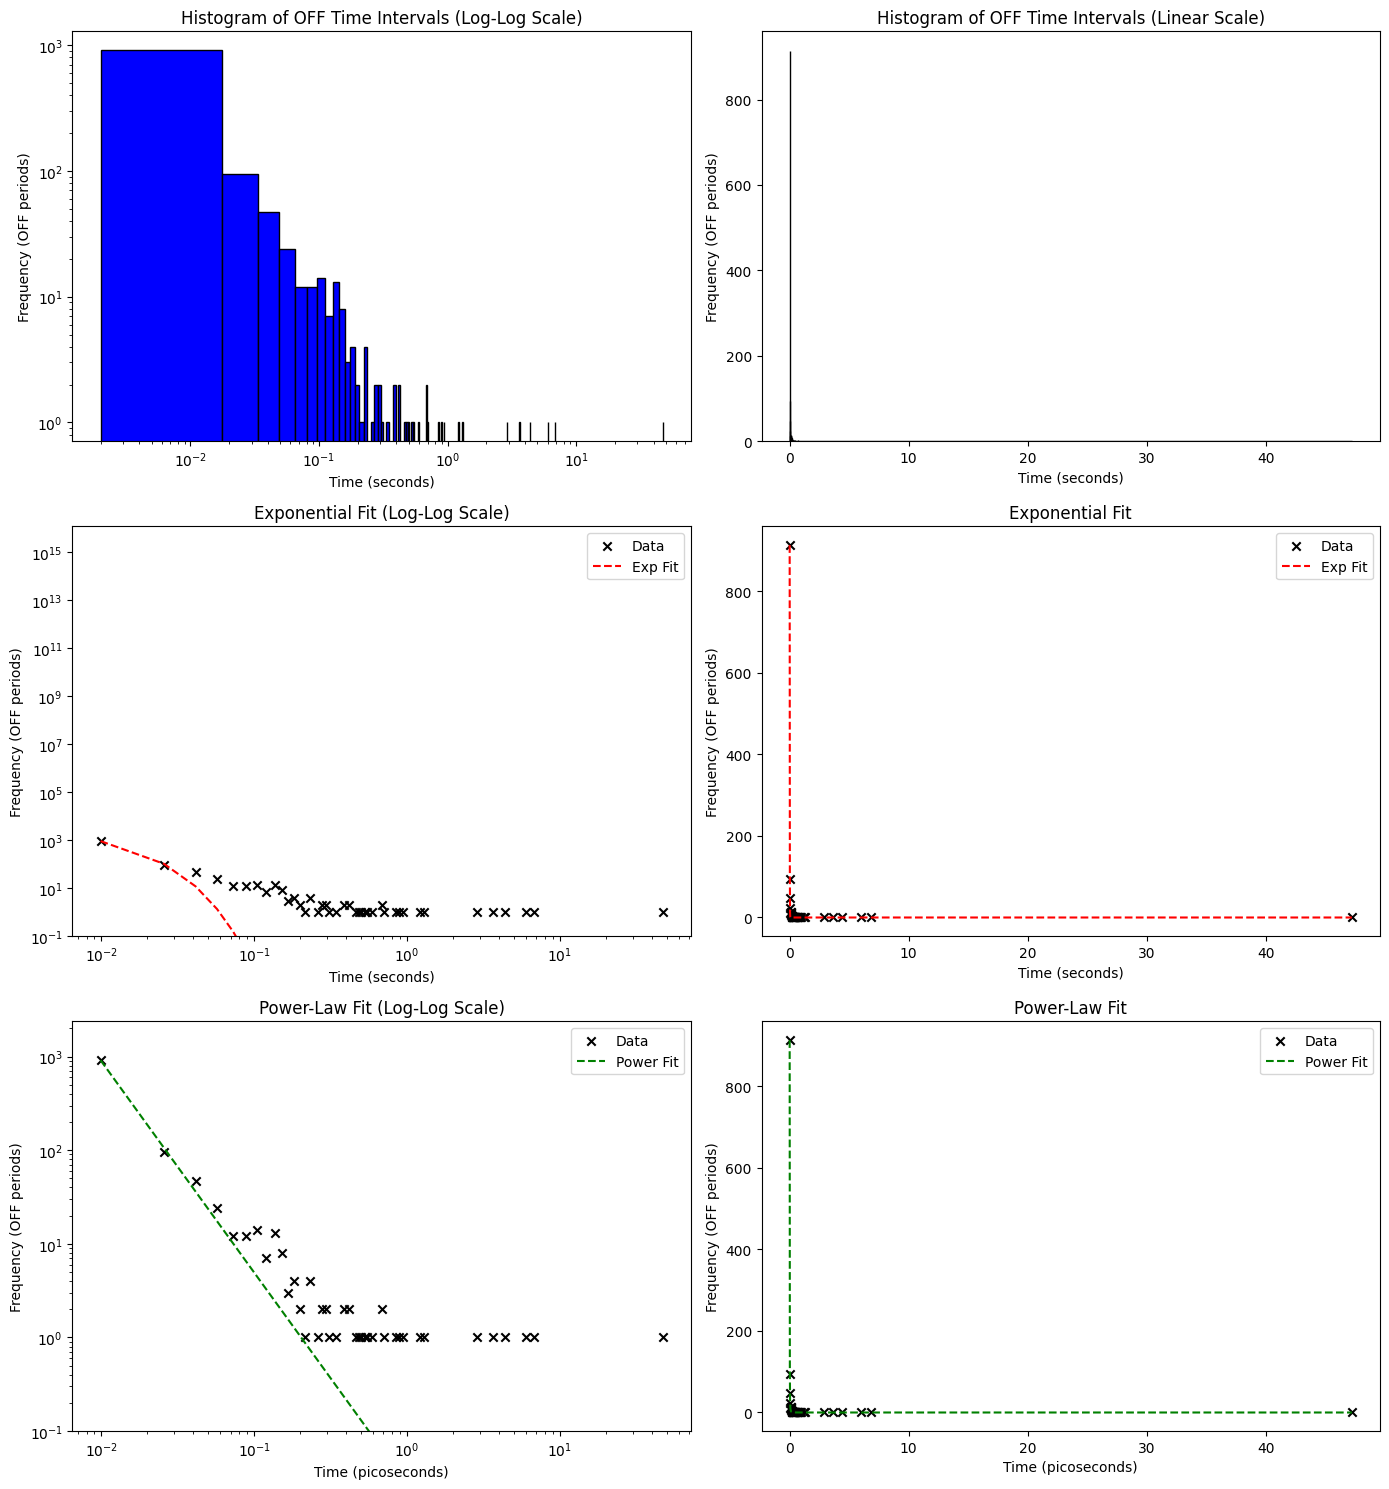

In [312]:
# Define parameters
n_bin_interval = 3000
intervals_OFF_sec = intervals_OFF
intervals_OFF_sec = intervals_OFF * 1e-12 # Tenemos el tiempo en segundos
min_val = np.min(intervals_OFF_sec)
max_val = np.max(intervals_OFF_sec)

# Calculate histogram data for fitting
counts, bin_edges = np.histogram(intervals_OFF_sec, bins=n_bin_interval, range=(min_val, max_val))
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Creamos una máscara booleana donde counts no es igual a 0
mask = counts != 0
# Aplicamos la máscara a ambos arrays
counts_OFF = counts[mask]
bin_centers_OFF = bin_centers[mask]

# ---- Define fit functions ----
def exponential_decay(tau, A, tau_0):
    return A * np.exp(-tau / tau_0)

def power_law(tau, a, alpha):
    return a * tau ** (-1 - alpha)

# ---- Perform fits ----
# Initial parameter guesses
exp_initial_guess = [max(counts_OFF), 1]
power_initial_guess = [max(counts_OFF), 1]

# Fit exponential decay
exp_params, exp_covariance = curve_fit(exponential_decay, bin_centers_OFF, counts_OFF, p0=exp_initial_guess)
exp_errors = np.sqrt(np.diag(exp_covariance))  # Errors are the square root of the diagonal of the covariance matrix

# Fit power law
power_params, power_covariance = curve_fit(power_law, bin_centers_OFF, counts_OFF, p0=power_initial_guess)
power_errors = np.sqrt(np.diag(power_covariance))

# ---- Print parameters and errors ----
print("Exponential Decay Fit Parameters:")
print(f"A = {exp_params[0]:.3f} ± {exp_errors[0]:.3f}")
print(f"tau_0 = {exp_params[1]:.4f} ± {exp_errors[1]:.4f} seconds \n")
print("Power Law Fit Parameters:")
print(f"a = {power_params[0]:.3f} ± {power_errors[0]:.3f}")
print(f"alpha = {power_params[1]:.4f} ± {power_errors[1]:.4f}")

# Create a figure with 3 rows and 2 columns of subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 15))

# ---- Original Histogram ----
# Plot histogram with logarithmic scale
axs[0, 0].hist(intervals_OFF_sec, bins=n_bin_interval, range=(min_val, max_val), color='blue', edgecolor='black')
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel("Time (seconds)")
axs[0, 0].set_ylabel("Frequency (OFF periods)")
axs[0, 0].set_title("Histogram of OFF Time Intervals (Log-Log Scale)")

# Plot histogram with linear scale
axs[0, 1].hist(intervals_OFF_sec, bins=n_bin_interval, range=(min_val, max_val), color='blue', edgecolor='black')
axs[0, 1].set_xlabel("Time (seconds)")
axs[0, 1].set_ylabel("Frequency (OFF periods)")
axs[0, 1].set_title("Histogram of OFF Time Intervals (Linear Scale)")

# ---- Scatter Plot of Binned Frequencies with Fits ----
# Plot scatter with log-log scale
axs[1, 0].scatter(bin_centers_OFF, counts_OFF, color='k', marker='x', label="Data")
axs[1, 0].plot(bin_centers_OFF, exponential_decay(bin_centers_OFF, *exp_params), color='red', linestyle='--', label="Exp Fit")
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_ylim(bottom=1e-1)
axs[1, 0].set_xlabel("Time (seconds)")
axs[1, 0].set_ylabel("Frequency (OFF periods)")
axs[1, 0].set_title("Exponential Fit (Log-Log Scale)")
axs[1, 0].legend()

# Plot scatter with linear scale
axs[1, 1].scatter(bin_centers_OFF, counts_OFF, color='k', marker='x', label="Data")
axs[1, 1].plot(bin_centers_OFF, exponential_decay(bin_centers_OFF, *exp_params), color='red', linestyle='--', label="Exp Fit")
axs[1, 1].set_xlabel("Time (seconds)")
axs[1, 1].set_ylabel("Frequency (OFF periods)")
axs[1, 1].set_title("Exponential Fit")
axs[1, 1].legend()

# ---- Individual Fit Plots ----
# Power-Law fit in log scale
axs[2, 0].scatter(bin_centers_OFF, counts_OFF, color='k', marker='x', label="Data")
axs[2, 0].plot(bin_centers_OFF, power_law(bin_centers_OFF, *power_params), color='green', linestyle='--', label="Power Fit")
axs[2, 0].set_xscale('log')
axs[2, 0].set_yscale('log')
axs[2, 0].set_ylim(bottom=1e-1)
axs[2, 0].set_xlabel("Time (picoseconds)")
axs[2, 0].set_ylabel("Frequency (OFF periods)")
axs[2, 0].set_title("Power-Law Fit (Log-Log Scale)")
axs[2, 0].legend()

# Power-law fit in log-log scale
axs[2, 1].scatter(bin_centers_OFF, counts_OFF, color='k', marker='x', label="Data")
axs[2, 1].plot(bin_centers_OFF, power_law(bin_centers_OFF, *power_params), color='green', linestyle='--', label="Power Fit")
axs[2, 1].set_xlabel("Time (picoseconds)")
axs[2, 1].set_ylabel("Frequency (OFF periods)")
axs[2, 1].set_title("Power-Law Fit")
axs[2, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

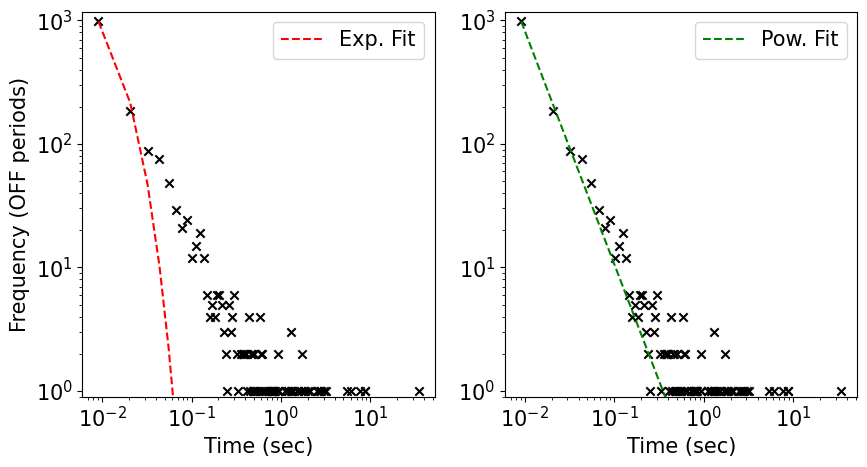

alpha = 0.8881 ± 0.0203


In [292]:
# Define font size
font_size = 15

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot exponential fit with log-log scale
axs[0].scatter(bin_centers_OFF, counts_OFF, color='k', marker='x')
axs[0].plot(bin_centers_OFF, exponential_decay(bin_centers_OFF, *exp_params), color='red', linestyle='--', label="Exp. Fit")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(bottom=0.9, top = max(counts_OFF) + max(counts_OFF)/5)
axs[0].set_xlabel("Time (sec)", fontsize=font_size)
axs[0].set_ylabel("Frequency (OFF periods)", fontsize=font_size)
axs[0].legend(fontsize=font_size)

# Plot power-law fit with log-log scale
axs[1].scatter(bin_centers_OFF, counts_OFF, color='k', marker='x')
axs[1].plot(bin_centers_OFF, power_law(bin_centers_OFF, *power_params), color='green', linestyle='--', label="Pow. Fit")
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylim(bottom=0.9, top=max(counts_OFF) + max(counts_OFF)/5)
axs[1].set_xlabel("Time (sec)", fontsize=font_size)
# axs[1].set_ylabel("Frequency (ON periods)", fontsize=font_size)
axs[1].legend(fontsize=font_size)

# Adjust tick parameters for both axes (size of tick labels)
for ax in axs:
    ax.tick_params(axis='both', which='both', labelsize=font_size)  # Apply font size to ticks

plt.show()

print(f"alpha = {power_params[1]:.4f} ± {power_errors[1]:.4f}")

## Plot of the autocorrelation graph without the OFF periods

In [232]:
total_len = sum(len(acc_list[i][0]) for i in range(len(acc_list)))
acc = np.zeros([total_len, 2])
index = 0

for i in range(len(acc_list)):
    for j in range(len(acc_list[i][0])):
        acc[index,:] = [acc_list[i][0][j], acc_list[i][1][j]]
        index += 1
        
df = pd.DataFrame(acc)

In [233]:
# Variables de entrada
bin_width = 1000      # Anchura del bin en picosegundos
nbin = 1000          # Número total de bins

flag = 0
ini_t1 = 0

# Rango máximo de delays a considerar
max_delay = bin_width * nbin / 2

# Extrae los tiempos de llegada de cada canal, ignorando ceros
times_channel_0 = df[0].values
times_channel_1 = df[1].values

# Inicializa una lista para almacenar los delays
delay_matrix = []

# Iterar sobre eventos del canal 0, ignorando ceros
for t0 in times_channel_0:
    if t0 == 0:
        continue  # Saltar eventos en canal 0 que son ceros
    for n_t1, t1 in enumerate(times_channel_1[ini_t1:], start=ini_t1):
        if t1 == 0:
            continue  # Saltar eventos en canal 1 que son ceros
        
        delay = t0 - t1
        
        if max_delay > delay and flag == 0:
            flag = 1 # Hacemos esto ya que en un mismo rango podemos encontrar varios delays que cumplan la solucion
            ini_t1 = n_t1

        # Si el delay cae dentro del rango de bineado, guárdalo
        if -max_delay <= delay <= max_delay:
            delay_matrix.append(delay)
        # Si el delay supera el mínimo, termina la comparación con t1
        elif delay < -max_delay:
            flag = 0
            break

# Convierte la lista de delays a un array de Numpy para optimizar operaciones
delay_matrix = np.array(delay_matrix)

# Define los bins para el histograma
bins = np.arange(-max_delay, max_delay + bin_width, bin_width)


# Graficar el histograma de delays
plt.hist(delay_matrix, bins=bins, histtype='step')
plt.xlabel("Delay (ps)")
plt.ylabel("Counts")
plt.title("Histogram ON periods")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

In [ ]:
# Computa el histograma para obtener los conteos en cada bin
counts, bin_edges = np.histogram(delay_matrix, bins=bins)
# Define las posiciones en el eje x como el centro de cada bin
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

xcorr = bin_centers
ycorr = counts

# PW Excitation

In [ ]:
# Define the fitting function: 
def fitting_function(tau, a, b_left, t_0_left, tau_0_left, b, t_0, tau_0, b_right, t_0_right, tau_0_right):
    return a + (b_left * np.exp(-np.abs(tau - t_0_left) / tau_0_left)) + (b * np.exp(-np.abs(tau - t_0) / tau_0)) + (b_right * np.exp(-np.abs(tau - t_0_right) / tau_0_right))

# Function to normalize counts and fit the data
def fit_noblinking(tau, counts):
    # Initial parameter guess [a, b_left, t_0_left, tau_0_left, b, t_0, tau_0, b_right, t_0_right, tau_0_right]
    p0 = [1, 1, -100, 5, 1, 0, 5, 1, 100, 5]
    
    # Perform the curve fitting
    popt, pcov = curve_fit(fitting_function, tau, counts, p0=p0)
    
    return popt, pcov

# Function to plot the normalized data and the fitted curve
def plot_fit_noblinking(tau, counts, params, width, height, font_size):
    # Create the plot
    plt.figure(figsize=(width, height))
    
    # Plot normalized data
    plt.plot(tau, counts, linestyle='-', color='black', linewidth=0.7, label='Normalized Data')
    
    # Generate the fitted curve
    tau_fine = np.linspace(min(tau), max(tau), 100000)
    fitted_curve = fitting_function(tau_fine, *params)
    
    # Plot fitted curve
    plt.plot(tau_fine, fitted_curve, 'g-', label='Fitted Curve')
    
    # Etiquetas de los ejes con tamaño de fuente modificado
    plt.xlabel('Time differences (ns)', fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    # plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
params, pcov = fit_noblinking(xcorr/1000, ycorr)

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))

print(f"a: {params[0]:.3f} ± {perr[0]:.3f} counts")
print(f"b_left: {params[1]:.3f} ± {perr[1]:.3f} counts")
print(f"t_0_left: {params[2]:.3f} ± {perr[2]:.3f} ns")
print(f"tau_0_left: {params[3]:.3f} ± {perr[3]:.3f} ns \n")

print(f"b: {params[4]:.3f} ± {perr[4]:.3f} counts")
print(f"t_0: {params[5]:.3f} ± {perr[5]:.3f} ns")
print(f"tau_0: {params[6]:.3f} ± {perr[6]:.3f} ns \n")

print(f"b_right: {params[7]:.3f} ± {perr[7]:.3f} counts")
print(f"t_0_right: {params[8]:.3f} ± {perr[8]:.3f} ns")
print(f"tau_0_right: {params[9]:.3f} ± {perr[9]:.3f} ns \n")

a: 610.758 ± 574745.402 counts
b_left: -259.913 ± 18737076.088 counts
t_0_left: -1019.889 ± 317803140.488 ns
tau_0_left: -4408.540 ± 1100343.558 ns 

b: 97.709 ± 1151.568 counts
t_0: 464.500 ± 33.673 ns
tau_0: 698.629 ± 8405.214 ns 

b_right: -37.615 ± 660937.194 counts
t_0_right: 210.839 ± 948.638 ns
tau_0_right: -14126.126 ± 248160089.104 ns 



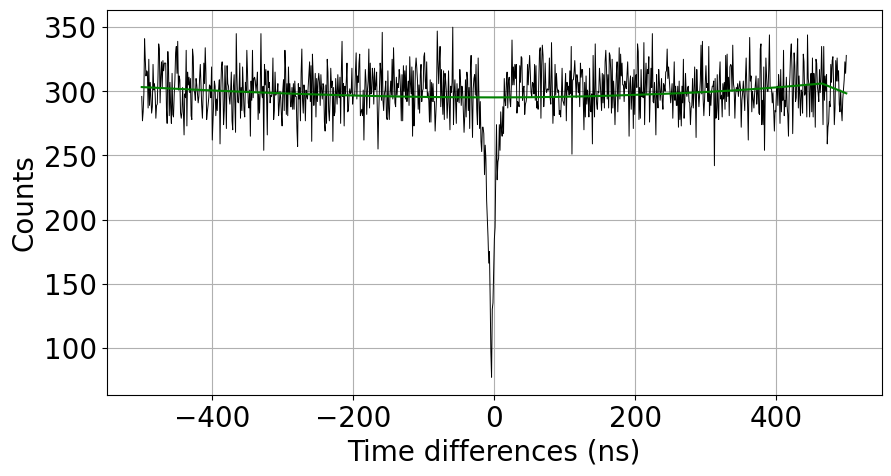

In [ ]:
# Plot the normalized data and the fitted curve
plot_fit_noblinking(xcorr/1000, ycorr, params, width=10, height=5, font_size=20)

# CW Excitation

In [ ]:
# Define the fitting function: a * (1 - b * exp(abs(tau - t0) / tau0)
def fitting_function(tau, t_0, tau_0, a, b):
    return a * (1 - b * np.exp(-np.abs(tau - t_0) / tau_0))

# Function to normalize counts and fit the data
def fit_params(tau, counts, expected_a):
    
    # Perform the curve fitting
    popt, pcov = curve_fit(fitting_function, tau, counts, p0=[-5, 10, expected_a, 1])
    
    return popt, pcov

# Function to plot the normalized data and the fitted curve
def plot_fit_noblinking(tau, counts, t_0, tau_0, a, b, width, height, font_size):
    # Crear la figura
    plt.figure(figsize=(width, height))
    
    # Graficar los datos normalizados
    plt.plot(tau, counts, linestyle='-', color='black', linewidth=0.7, label='Normalized Data')
    
    # Generar la curva ajustada
    tau_fine = np.linspace(min(tau), max(tau), 10000)
    fitted_curve = fitting_function(tau_fine, t_0, tau_0, a, b)
    
    # Graficar la curva ajustada
    plt.plot(tau_fine, fitted_curve, 'g-')
    
    # Etiquetas de los ejes con tamaño de fuente modificado
    plt.xlabel('Time differences (ns)', fontsize=font_size)
    plt.ylabel('Counts', fontsize=font_size)
    
    # Cambiar el tamaño de los números en los ejes
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    
    # Activar la cuadrícula
    plt.grid(True)
    
    # Mostrar el gráfico
    plt.show()


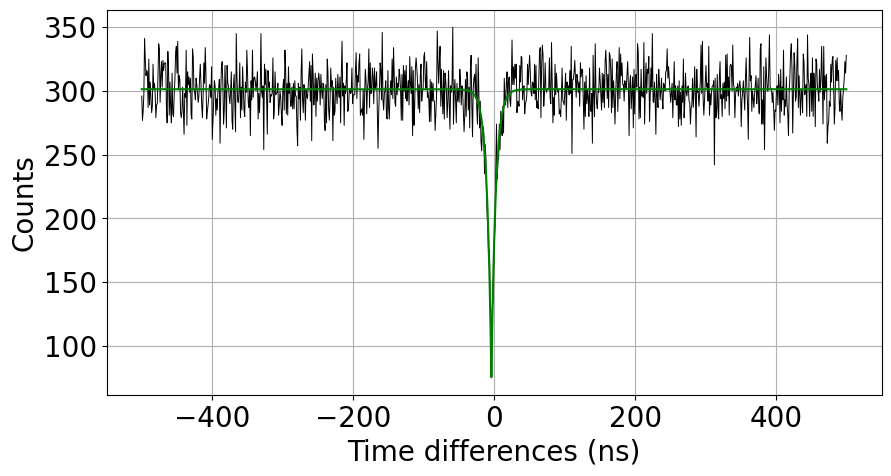

In [ ]:
popt, pcov = fit_params(xcorr/1000, ycorr, 100)
# Extract fitted parameters
t_0, tau_0, a, b = popt

# Plot the normalized data and the fitted curve
plot_fit_noblinking(xcorr/1000, ycorr, t_0, tau_0, a, b, width=10, height=5, font_size=20)

### Obtention of the normalized graph

In [ ]:
popt, pcov = fit_params(xcorr/1000, ycorr, 100)
# Extract fitted parameters
t_0, tau_0, a, b = popt

counts_normalized = ycorr/a

popt, pcov = fit_params(xcorr/1000, counts_normalized, 1)
# Extract fitted parameters
t_0, tau_0, a, b = popt

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(pcov))
error_t0, error_tau0, error_a, error_b = perr

# Print fitted parameters and their errors
print(f"Fitted parameters:\n t₀ = {t_0:.3f} ± {error_t0:.3f} ns \n a = {1:.3f} ± {error_a/a:.3f} \n b = {b/a:.3f} ± {error_b/a:.3f}")
print(f"Lifetime = {tau_0:.2f} ± {error_tau0:.2f} ns")

# Calculate g²(τ = t₀)
value_at_t_0 = fitting_function(t_0, t_0, tau_0, a, b)
error_value_at_t_0 = np.sqrt(error_a**2 + error_b**2)  # Estimate error propagation
print(f"g²(τ = t₀) = {value_at_t_0:.3f} ± {error_value_at_t_0:.3f}")

Fitted parameters:
 t₀ = -3.775 ± 0.190 ns 
 a = 1.000 ± 0.002 
 b = 0.753 ± 0.033
Lifetime = 6.18 ± 0.38 ns
g²(τ = t₀) = 0.247 ± 0.033


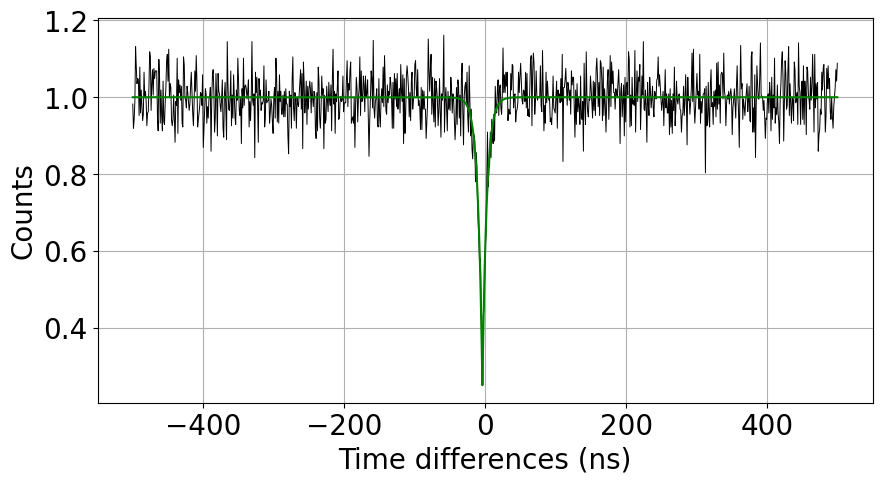

In [ ]:
plot_fit_noblinking(xcorr/1000, counts_normalized, t_0, tau_0, a, b, width=10, height=5, font_size = 20)